# Web Scraping
The main aim of this study was to investigate the language used in a novel using the tools available from [__BeautifulSoup__](https://www.crummy.com/software/BeautifulSoup/) and [__NLTK__](https://www.nltk.org/). Additionally, data visualisation was prepared by means of [__Matplotlib__](https://matplotlib.org/).

## 1. Data collection
The novel chosen for the purpose of this research is titled _Anne of Green Gables_ by Lucy Maud Montgomery. Data was accessed through [_Project Gutenberg_](https://www.gutenberg.org/), an online library containing free eBooks.

In [154]:
import requests
page = requests.get('https://www.gutenberg.org/files/45/45-h/45-h.htm')

## 2. Data preparation
The next step was cleaning the data and preparing it for further analysis. First, __BeautifulSoup__ was used to divide the text into paragraphs using __the HTML parser__ available in the package. On top of that, unnecessary new lines were removed. An example of such transformation performed on the first paragraph may be seen below.

In [155]:
from bs4 import BeautifulSoup
content = BeautifulSoup(page.content, 'html.parser')
paragraphs = content.find_all('p')
print(paragraphs[0])

<p class="pfirst">
<span class="dropcap" style="font-size: 4.00em">M</span>RS. Rachel Lynde lived
just where the Avonlea main road dipped down into a little hollow, fringed with
alders and ladies’ eardrops and traversed by a brook that had its source
away back in the woods of the old Cuthbert place; it was reputed to be an
intricate, headlong brook in its earlier course through those woods, with dark
secrets of pool and cascade; but by the time it reached Lynde’s Hollow it
was a quiet, well-conducted little stream, for not even a brook could run past
Mrs. Rachel Lynde’s door without due regard for decency and decorum; it
probably was conscious that Mrs. Rachel was sitting at her window, keeping a
sharp eye on everything that passed, from brooks and children up, and that if
she noticed anything odd or out of place she would never rest until she had
ferreted out the whys and wherefores thereof.
</p>


In [156]:
text = []
for item in paragraphs:
    processed = item.get_text()
    processed = processed.strip()
    processed = processed.replace('\r\n',' ')
    text.append(processed)
print(text[0])

MRS. Rachel Lynde lived just where the Avonlea main road dipped down into a little hollow, fringed with alders and ladies’ eardrops and traversed by a brook that had its source away back in the woods of the old Cuthbert place; it was reputed to be an intricate, headlong brook in its earlier course through those woods, with dark secrets of pool and cascade; but by the time it reached Lynde’s Hollow it was a quiet, well-conducted little stream, for not even a brook could run past Mrs. Rachel Lynde’s door without due regard for decency and decorum; it probably was conscious that Mrs. Rachel was sitting at her window, keeping a sharp eye on everything that passed, from brooks and children up, and that if she noticed anything odd or out of place she would never rest until she had ferreted out the whys and wherefores thereof.


Then, __NLTK__ module was used to tokenize the sentences and label the words depending on the part of speech they belong to. Punctuation marks were excluded. The access to the full list of part-of-speech tags is provided by the [__Penn Treebank website__](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). Two lists were created - the first one contains all the tokens and the second one contains POS tagged tokens.

In [157]:
import nltk

text_tokens=[]
text_tt = []
punctuation = [',',':','.',"''",'’','“','”','?','!']
for sentence in text:
    tokenized = nltk.word_tokenize(sentence)
    for item in tokenized:
        if item in punctuation:
            pass
        else:
            text_tokens.append(item)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        if item[1] in punctuation:
            pass
        else:
            text_tt.append(item)
print(text_tt[:30]) 

[('MRS.', 'NNP'), ('Rachel', 'NNP'), ('Lynde', 'NNP'), ('lived', 'VBD'), ('just', 'RB'), ('where', 'WRB'), ('the', 'DT'), ('Avonlea', 'NNP'), ('main', 'JJ'), ('road', 'NN'), ('dipped', 'VBD'), ('down', 'RB'), ('into', 'IN'), ('a', 'DT'), ('little', 'JJ'), ('hollow', 'NN'), ('fringed', 'VBN'), ('with', 'IN'), ('alders', 'NNS'), ('and', 'CC'), ('ladies', 'NNS'), ('’', 'NNP'), ('eardrops', 'NNS'), ('and', 'CC'), ('traversed', 'VBN'), ('by', 'IN'), ('a', 'DT'), ('brook', 'NN'), ('that', 'WDT'), ('had', 'VBD')]


The next step was preparing a Python dictionary in order to calculate the number of occurrences of each tag.

In [158]:
count = {}
for item in text_tt:
    if item[1] not in count:
        count[item[1]] = 1
    else:
        count[item[1]] += 1

for item in count:
     print(f'{item}: {count[item]}')

NNP: 9032
VBD: 7635
RB: 7359
WRB: 765
DT: 8058
JJ: 8718
NN: 15770
IN: 11218
VBN: 2100
NNS: 3445
CC: 4403
WDT: 286
PRP$: 2171
PRP: 11108
TO: 3025
VB: 5434
JJR: 268
MD: 1492
VBG: 1970
RP: 829
VBZ: 1796
EX: 319
VBP: 4019
WP: 510
CD: 454
JJS: 194
PDT: 215
RBR: 123
FW: 65
UH: 189
NNPS: 35
RBS: 44
WP$: 10
POS: 3


Furthermore, the data may be visualised using Matplotlib.

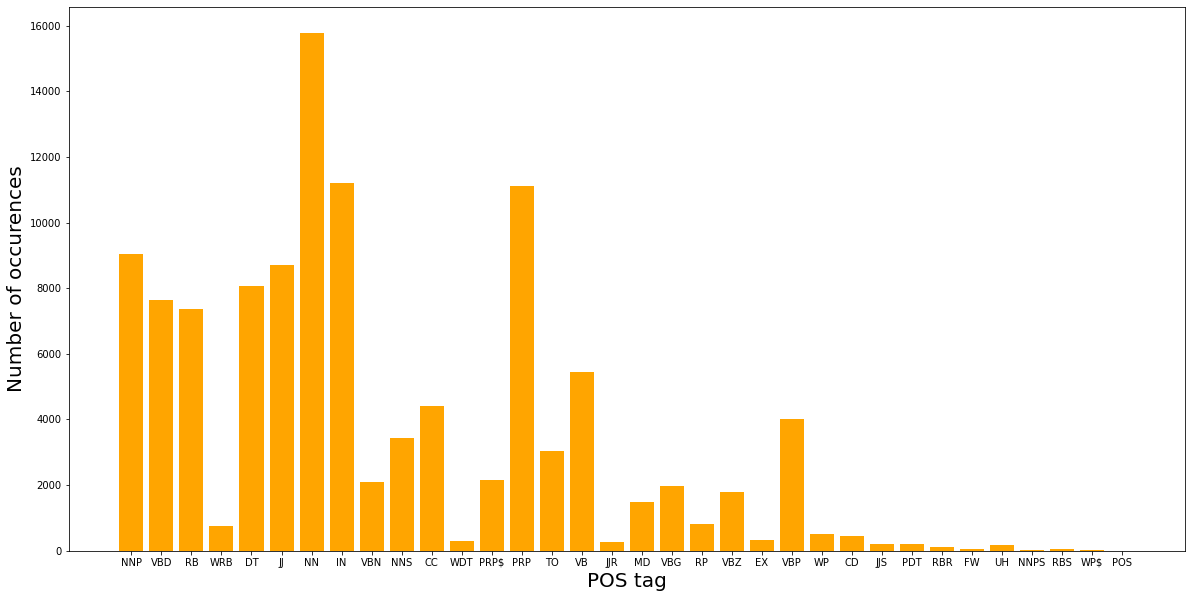

In [159]:
import matplotlib.pyplot as m
m.figure(figsize=(20,10))
m.bar(count.keys(), count.values(), color='orange')
m.xlabel('POS tag', size=20)
m.ylabel('Number of occurences', size=20)
m.show()

What is more, tokenized texts may be analysed in terms of frequency distribution of specific words. The code below displays 15 most frequent words, as well as the number of times the words _beautiful_, _pretty_ and _smile_ appeared.

In [160]:
frequency = nltk.FreqDist(text_tokens)

print(frequency.most_common(15))

print(f'The number of occurences of the word "beautiful": {text_tokens.count("beautiful")}')
print(f'The number of occurences of the word "pretty": {text_tokens.count("pretty")}')
print(f'The number of occurences of the word "smile": {text_tokens.count("smile")}')

[('the', 3656), ('I', 3201), ('and', 3102), ('to', 3005), ('a', 2135), ('of', 1859), ('it', 1672), ('you', 1444), ('in', 1428), ('was', 1359), ('her', 1265), ('that', 1241), ('she', 1185), ('t', 1183), ('Anne', 1171)]
The number of occurences of the word "beautiful": 44
The number of occurences of the word "pretty": 82
The number of occurences of the word "smile": 17


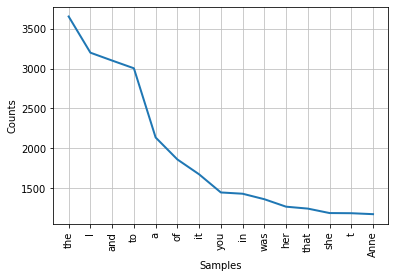

In [184]:
frequency.plot(15)
m.show()

## 3. Data analysis
The examination of the data presented above allows to draw various conclusions, for instance:
* Singular and mass nouns (NN) appear the most often in _Anne of Green Gables_.
* Adjectives (JJ) occur approximately half as often as singular and mass nouns.
* There is 65 foreign words (FW) in the book.
* The name of the main character, _Anne_, appeared 1171 times in the whole book.
* The word _pretty_ appeared approximately twice as often as the word _beautiful_.

### Conclusion
This project was undertaken to demonstrate the possibilities provided by modern technology. It becomes apparent that the application of open-source NLP tools and resources facilitates linguistic analysis.

The code presented above may be used to perform an analogous analysis on a different book available on _Project Gutenberg_.